# Data Science in Restaurant Analytics: Capstone Project

### **Overall Problem Statement**

#### Apply my data science skills to real-world restaurant data over 4 weeks. Analyze trends, build predictive models, and create a professional video showcasing your insights.

## **Week 1: Data Exploration**

### **Problem Statement:**

1. Dataset Overview: Explore dataset dimensions. Check for missing values. Perform data type conversions as needed.
2. Target Variable: Analyze "Aggregate rating" distribution. Address any class imbalances.
3. Descriptive Analysis: Calculate statistics for numerical columns. Explore categorical variables. Identify top 5 cuisines and cities.

### **Objectives**

The objective of this exploratory data analysis (EDA) is to understand the dataset by analyzing its structure, performing numerical statistics, and identifying the top 5 cuisines and cities.

### 1. **Dataset Overview**

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
from folium.plugins import MarkerCluster

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Load Dataset

In [4]:
dataset_original = "https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"


In [5]:
df = pd.read_csv(dataset_original)
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Data Understanding

In [6]:
df.shape

(9551, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.isnull().sum().sort_values(ascending = False)

Cuisines                9
Restaurant Name         0
Country Code            0
City                    0
Restaurant ID           0
Address                 0
Locality                0
Longitude               0
Locality Verbose        0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

The Cuisines has 9 null values so this records will be dropped

In [9]:
df['Aggregate rating'].skew()

np.float64(-0.9541304733200109)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [12]:
df.dropna(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

#### **Observation**

1. The dataset has 9,551 records with 21 columns.
2. No duplicate record
3. Tbe cuisines column contained 9 missing records and these records were dropped from the dataset.

### 2. i. **Aggregate Rating (Target Variable) Distribution**

Skewness: -0.9530521389484676


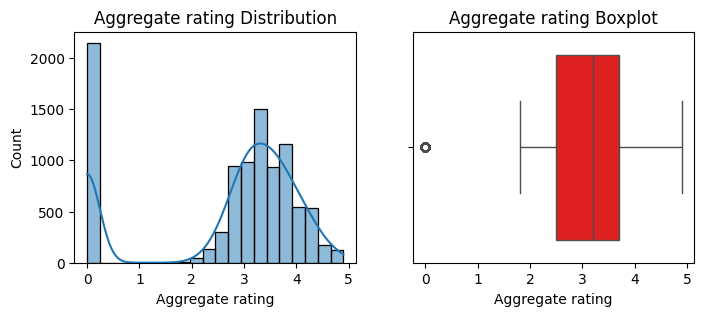

In [14]:
Skewness = df['Aggregate rating'].skew()
print(f"Skewness: {Skewness}")
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.histplot(df['Aggregate rating'], kde = True, bins = 20)
plt.title("Aggregate rating Distribution")
plt.subplot(1,2,2)
sns.boxplot(x = df['Aggregate rating'], color = 'red' )
plt.title("Aggregate rating Boxplot")
plt.show()

### ii. Class Imbalance

In [15]:
rating_count = df['Aggregate rating'].value_counts()


In [16]:
pd.DataFrame({'rating count': rating_count,
             'percentage': round((rating_count/len(df))* 100, 2)})

,rating count,percentage
Aggregate rating,,
0.0,2148,22.51
3.2,522,5.47
3.1,519,5.44
3.4,495,5.19
3.3,483,5.06
3.5,480,5.03
3.0,468,4.90
3.6,458,4.80
3.7,427,4.47


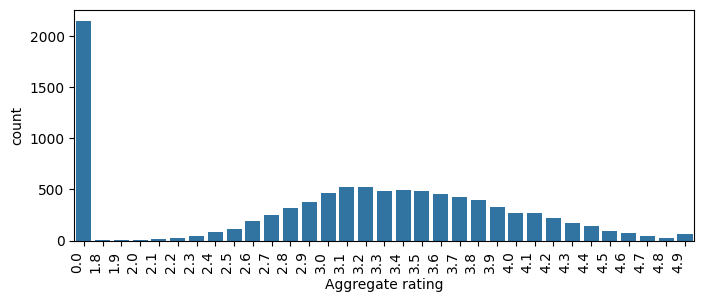

In [17]:
plt.figure(figsize=(8,3))
sns.countplot(x=df['Aggregate rating'])
plt.xticks(rotation=90, ha='right')
plt.show()

#### **Observation**

i. From the Distribution, we can see that the Target Variable is moderately left skewed with a skewness of -0.954 approximately. Also, the target variable(Aggregate rating) has some lower bound outliers.
ii. Class imbalance: It can be seen that the 0 rating constituted 22.5% approximately. However, class imabalance will not be addressed in the project because it is a regression problem and not classification problem.

## 3. **Descriptive Analysis**

### i. Statistics for Numerical Columns

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9542.0,9.043301e+06,8.791967e+06,53.000000,301931.250000,6.002726e+06,1.835260e+07,1.850065e+07
Country Code,9542.0,1.817921e+01,5.645160e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9542.0,6.427500e+01,4.119760e+01,-157.948486,77.081565,7.719203e+01,7.728204e+01,1.748321e+02
Latitude,9542.0,2.584853e+01,1.101009e+01,-41.330428,28.478658,2.857044e+01,2.864271e+01,5.597698e+01
Average Cost for two,9542.0,1.200326e+03,1.612874e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9542.0,1.804968e+00,9.055631e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9542.0,2.665238e+00,1.516588e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9542.0,1.567721e+02,4.302033e+02,0.000000,5.000000,3.100000e+01,1.300000e+02,1.093400e+04


### ii. Categorical Columns Exploration

In [19]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

#### Unique values

In [20]:
categorical_summary = df[cat_col].nunique()
categorical_summary


Restaurant Name         7437
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Rating color               6
Rating text                6
dtype: int64

#### Values with the highest frequency

In [21]:
mode_df = pd.DataFrame(
    {col: df[col].mode()[0] for col in cat_col}, index=['Mode'])
mode_df

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
Mode,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average


#### Top 5 Cuisines by Value count

In [22]:
df_exploded = df

In [23]:
# Split
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.split(',', regex=False)

df_exploded['Cuisines']

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9542, dtype: object

In [24]:
#df.to_csv('exploded.csv')

In [25]:
# Unpivot the cuisines column so as to have the lumped cuisines on a separate row
df_exploded = df_exploded.explode('Cuisines')
df_exploded

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,Cafe,...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,Italian,...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,World Cuisine,...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [26]:
# Strip so as to clean white space
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()


In [27]:
df_exploded['Cuisines'].head(10)

0      French
0    Japanese
0    Desserts
1    Japanese
2     Seafood
2       Asian
2    Filipino
2      Indian
3    Japanese
3       Sushi
Name: Cuisines, dtype: object

#### Top 5 Cuisines by Value Count

In [28]:
top5_cuisines = df_exploded['Cuisines'].value_counts().nlargest(5)
top5_cuisines

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64

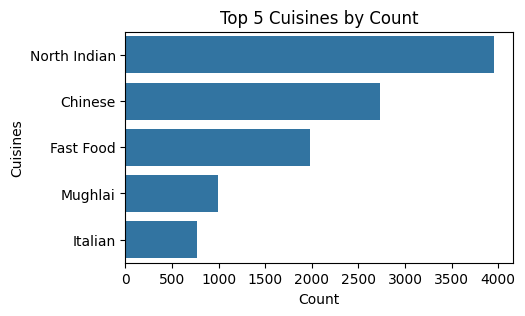

In [29]:
plt.figure(figsize=(5,3))
sns.barplot(x=top5_cuisines.values, y=top5_cuisines.index, legend = False)
plt.xlabel("Count")
plt.ylabel("Cuisines")
plt.title("Top 5 Cuisines by Count")
plt.show()

#### Top 5 Cities by Value Count

In [30]:
top5_cities = df['City'].value_counts().nlargest(5)
top5_cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

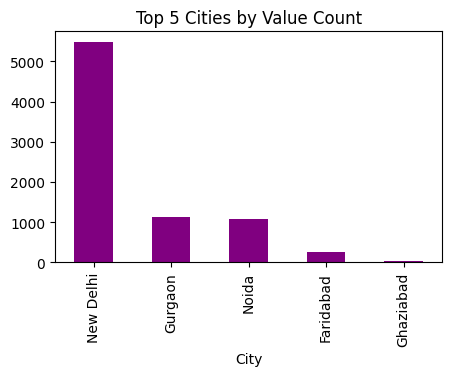

In [31]:
plt.figure(figsize=(5,3))
df['City'].value_counts().nlargest(5).plot(kind =  'bar', color = 'purple')
plt.title('Top 5 Cities by Value Count')
plt.show()

#### **Observation**

1. It was observed that the cuisines feature have some records with multiple cuisines combined in one entry, separated by comma and this has to be treated in order to get top 5 cuisines by value count.
2. North Indian cuisines has the highest aggregate rating followed by Chinese.
3. The highest City by value count is New Delhi.


## **Week 2: Data Visualization**

#### **Objectives**

1. Create histograms, bar plots, and box plots of ratings. Compare average ratings across cuisines and cities.
2. i Geospatial Analysis Map restaurant locations using coordinates.
ii. Analyze distribution across cities.
iii. Correlate location with ratings.
3. i Additional Analysis Identify outliers and their effects.
ii. Determine relationship between votes and ratings.

### 1. **Visualizations**

Create histograms, bar plots, and box plots of ratings. Compare average ratings across cuisines and cities.

<Axes: xlabel='Aggregate rating', ylabel='Count'>

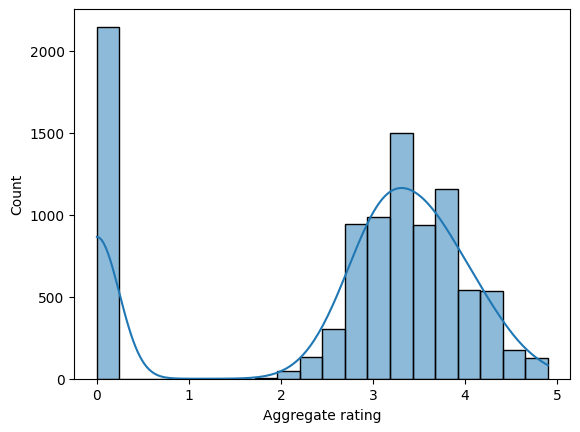

In [32]:
sns.histplot(df['Aggregate rating'], bins = 20, kde = True)

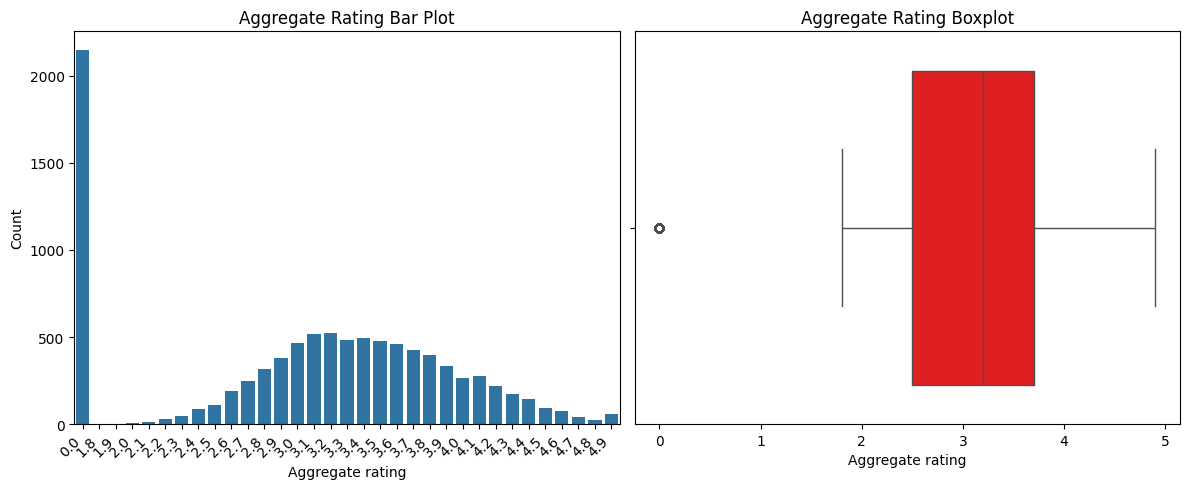

In [33]:
rating_counts = df['Aggregate rating'].value_counts().sort_index().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create bar plot with seaborn
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(x='Rating', y='Count', data=rating_counts)
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title('Aggregate Rating Bar Plot')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(x = df['Aggregate rating'], color = 'red' )
plt.title("Aggregate Rating Boxplot")
plt.show()


In [34]:
print(f'Cuisines unique count:{df_exploded.Cuisines.nunique()}')
print(f'City unique count {df_exploded.City.nunique()}')

Cuisines unique count:145
City unique count 140


In [35]:
df['Restaurant Name'].nunique()

7437

#### Average rating across cuisines

In [36]:
cuisines_rating = df_exploded.groupby(df_exploded['Cuisines'])['Aggregate rating'].mean().nlargest(10)
cuisines_rating = round(cuisines_rating,4)
cuisines_rating 

Cuisines
Sunda         4.9000
B�_rek        4.7000
Taiwanese     4.6500
Ramen         4.5000
Dim Sum       4.4667
Hawaiian      4.4125
Bubble Tea    4.4000
D�_ner        4.4000
Curry         4.4000
Kebab         4.3800
Name: Aggregate rating, dtype: float64

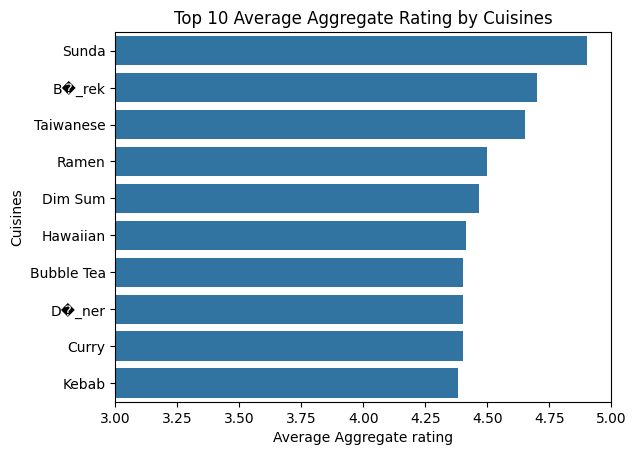

In [37]:
sns.barplot(x=cuisines_rating.values, y=cuisines_rating.index, legend = False)
plt.xlabel('Average Aggregate rating')
plt.title('Top 10 Average Aggregate Rating by Cuisines')
plt.xlim(3, 5)
plt.show()

In [38]:
city_rating = df.groupby(df['City'])['Aggregate rating'].mean().nlargest(10)
city_rating

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Lincoln             4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

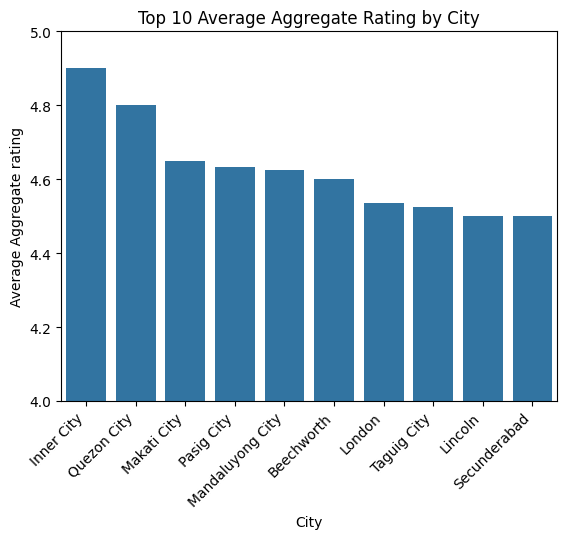

In [39]:
sns.barplot(x=city_rating.index, y=city_rating.values, legend = False)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Average Aggregate rating')
plt.title('Top 10 Average Aggregate Rating by City')
plt.ylim((4, 5))
#plt.text(x =0.5, y = 0.5, s = 'center')
plt.show()

#### **Observation**

It was observed that Inner City had the highest average aggregate rating,followed by Quezon City.

It was also observed that our first 10 cuisines by aggregate rating ranges from 4.9 - 4.38. This is after splitting and unpivoting the cuisines column.

### 2. **Geospatial Analysis**

#### i.Map Visualization

In [40]:
df[['Restaurant Name','City', 'Longitude', 'Latitude' ]].duplicated().sum()

np.int64(7)

In [41]:
map_df = df[['Restaurant ID','Restaurant Name', 'City', 'Longitude', 'Latitude','Aggregate rating']]
map_df

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Aggregate rating
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,4.8
1,6304287,Izakaya Kikufuji,Makati City,121.014101,14.553708,4.5
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,121.056831,14.581404,4.4
3,6318506,Ooma,Mandaluyong City,121.056475,14.585318,4.9
4,6314302,Sambo Kojin,Mandaluyong City,121.057508,14.584450,4.8
...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,��stanbul,28.977392,41.022793,4.1
9547,5908749,Ceviz A��ac۱,��stanbul,29.041297,41.009847,4.2
9548,5915807,Huqqa,��stanbul,29.034640,41.055817,3.7
9549,5916112,A���k Kahve,��stanbul,29.036019,41.057979,4.0


In [42]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     9542 non-null   int64  
 1   Restaurant Name   9542 non-null   object 
 2   City              9542 non-null   object 
 3   Longitude         9542 non-null   float64
 4   Latitude          9542 non-null   float64
 5   Aggregate rating  9542 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 521.8+ KB


In [43]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
print(f'average latitude: {center_lat}')
print(f'average longitude: {center_lon}')

average latitude: 25.84853159488723
average longitude: 64.27499746924892


In [44]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)
marker_cluster = MarkerCluster().add_to(restaurant_map)
for index, record in map_df.iterrows():
    coords = (record['Latitude'], record['Longitude'])
    restaurant_name = record['Restaurant Name']

    folium.Marker(
        location=coords,
        popup=f"Restaurant Name: {record['Restaurant Name']}",
        tooltip = f"Restaurant Name: {record['Restaurant Name']}<br>Average rating: {record['Aggregate rating']}<br>City: {record['City']}<br> Coordinates: {coords}"
    ).add_to(marker_cluster)

#restaurant_map

#### **Observation**

1. It was observed that we have 7 restaurants with same Restaurant Name, City, Longitude, and Latitude in order to prepare the dataset for the map, the "Restaurant ID" was introduced to distinguish these restaurants.  

2. From the map, it can be seen that we have more restaurants in India.
3. Also it can be seen that 497 restaurants are located on the Atlantic Ocean. This is because the restaurants have 0 latitude and longitude which implies that the restaurants have wrong coordinates when compared to the city the restaurants are situated.

#### ii. Analyze Distribution across cities

In [45]:
city_distribution = df.groupby('City')['Restaurant Name'].count().reset_index()
city_distribution.rename(columns={'Restaurant Name': 'Restaurant_Count'}, inplace = True)
city_distribution = city_distribution.sort_values(by='Restaurant_Count', ascending = False).head(10)

city_distribution



,City,Restaurant_Count
87,New Delhi,5473
50,Gurgaon,1118
88,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
17,Bhubaneshwar,21
51,Guwahati,21
69,Lucknow,21
2,Ahmedabad,21
5,Amritsar,21


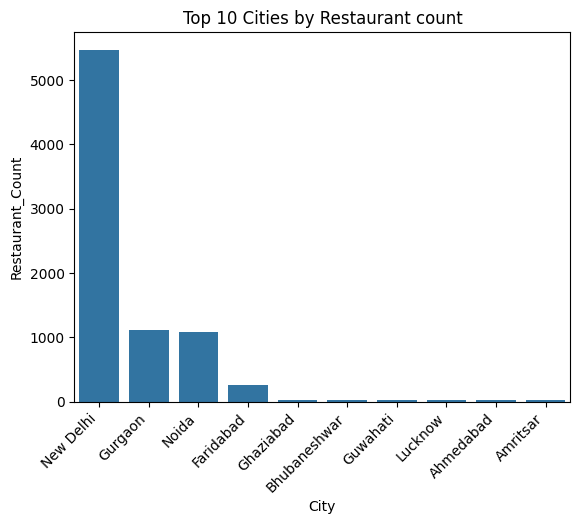

In [46]:
sns.barplot(data = city_distribution, x= city_distribution['City'], y= city_distribution['Restaurant_Count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Restaurant count')
plt.show()



#### **Observation**

New Delhi has the largest population in terms of count of restaurants, followed by a neighbouring city, Gurgaon.

#### iii. Correlation

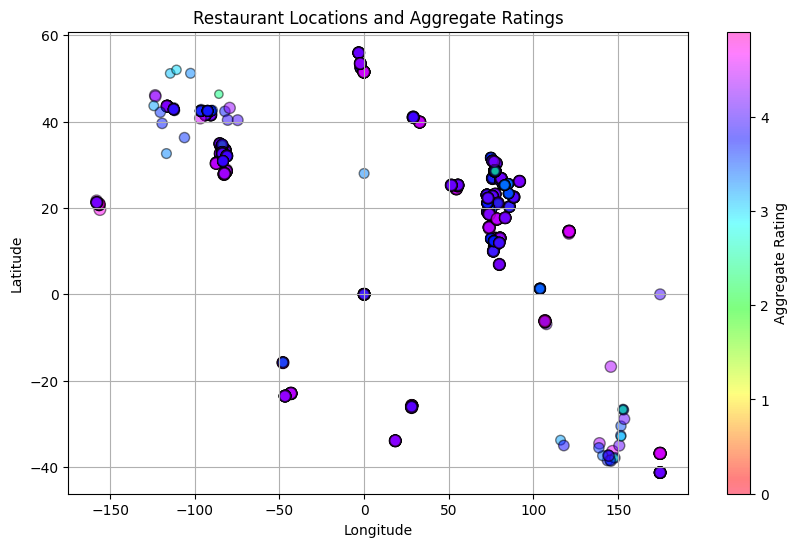

In [47]:
plt.figure(figsize=(10, 6))
#Note: The "Average rating" is multiplied by 15 in order to hence the circle visibility.
scatter = plt.scatter(map_df['Longitude'], map_df['Latitude'], s=map_df['Aggregate rating']*15, alpha= 0.5, c=map_df['Aggregate rating'], edgecolors='k',cmap='gist_rainbow')

plt.title('Restaurant Locations and Aggregate Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(scatter)
cbar.set_label('Aggregate Rating')

plt.grid()
plt.show()

#### **Observation**

**Rating Text:**  A scale of 0-5 was used for the aggregate rating.
1. 0- Not rated
2. 1-2.49: Poor
3. 2.5-3.49: Average
4. 3.5-3.99: Good
5. 4-4.49: Very good
6. 4.5 and above: Excellent

The size of each dot is proportional to the restaurant's aggregate rating
1. Clusters of dots indicate areas with a high density of restaurants
2. The clustered circles in blue indicate restaurants with average good rating of 3.5-3.99  while areas with light purple are restaurants ranging with a rating of 4-4.9 i.e very good to excllent.

### 3. **Additional Analysis**

#### i. Outliers

In [48]:
Q1 = df['Aggregate rating'].quantile(.25)
Q3 = df['Aggregate rating'].quantile(.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"lower bound: {lower_bound}\nupper bound: {upper_bound}")

# Outliers are values below the lower bound or values above the upper bound
outliers = df[(df['Aggregate rating'] < lower_bound) | (df['Aggregate rating'] > upper_bound)]
outliers


lower bound: 0.6999999999999997
upper bound: 5.5


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"[Brazilian, Cafe]",...,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"[Bar Food, Brazilian]",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,[Brazilian],...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino Fog��o,30,S��o Paulo,"Shopping Metr�� Santa Cruz - Piso L2, Rua Domi...","Shopping Metr�� Santa Cruz, Vila Mariana","Shopping Metr�� Santa Cruz, Vila Mariana, S��o...",-46.637167,-23.599500,"[Brazilian, Mineira]",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,S��o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, S��o Paulo",-46.698574,-23.622925,[Brazilian],...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,[Fast Food],...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,[Fast Food],...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"[North Indian, Chinese]",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"[Raw Meats, Fast Food]",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


#### **Observation**

2,148 restaurants have been identified as outliers using the interquantile range method of identifying outliers.

**Effect of Outliers**

i. These outliers affected the distribution of the aggregate rating by making it left skewed.
ii. Misleading analysis
iii. Reducing model accuracy.

#### ii. **Correlation between votes and aggregate rating**

<Axes: >

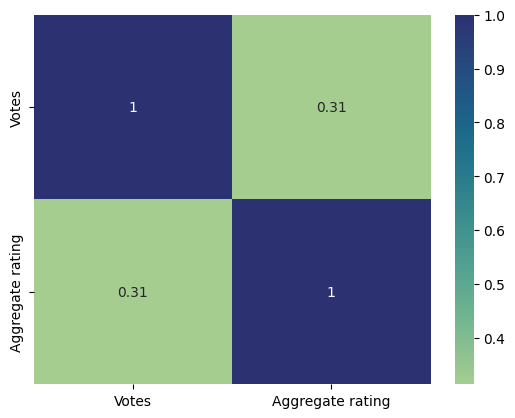

In [49]:
x = df[['Votes', 'Aggregate rating']]
corr = x.corr()
sns.heatmap(corr, cmap = 'crest',annot = True)

#### **Observation**

A weak positive correlation was seen between votes and aggregate rating.
This means that restaurants with more votes tend to have higher aggregate ratings.

## Week 3:  Customer Preferences

### Objectives

1. Identify highest-rated cuisines
2. Compare ratings across price points
3. Analyze table booking and delivery

### 1. Cuisine Analysis

In [50]:
# Group Cuisines by average rating
average_cuisines_rating = df_exploded.groupby('Cuisines')['Aggregate rating'].mean()
highest_rated_cuisine = average_cuisines_rating.sort_values(ascending = False).head(5)
highest_rated_cuisine


Cuisines
Sunda        4.900000
B�_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
Name: Aggregate rating, dtype: float64

### 2. Price Range

In [51]:
# Group Price by average rating
average_price_rating = df_exploded.groupby('Price range')['Aggregate rating'].mean()
average_price_rating

Price range
1    2.123560
2    3.012253
3    3.703060
4    3.819914
Name: Aggregate rating, dtype: float64

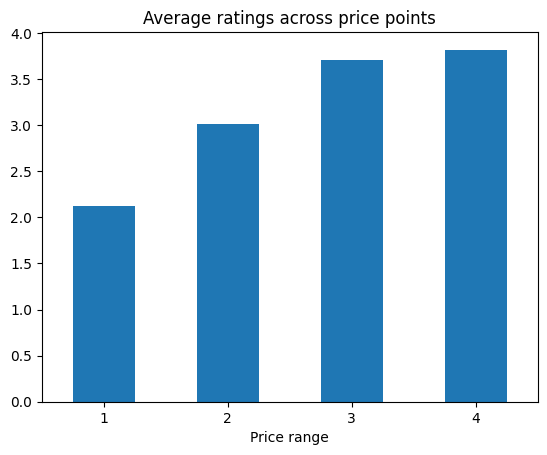

In [52]:
average_price_rating.plot(kind= 'bar')
plt.title('Average ratings across price points')
plt.xticks(rotation = 360)
plt.show()

#### Observation

Price range with the highest rating is 4.

Sunda is the cuisine with the highest rating.

### 3 Service Features

Has Table booking
No     8384
Yes    1158
Name: count, dtype: int64


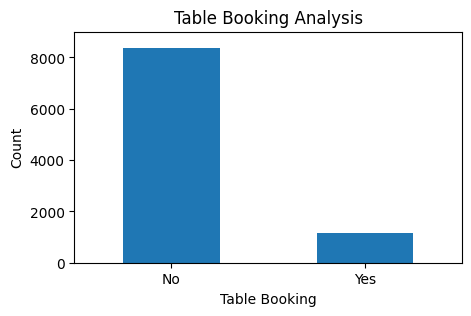

In [53]:
# Restaurant with or without Table booking
print(df['Has Table booking'].value_counts())
plt.figure(figsize = (5,3))
df['Has Table booking'].value_counts().plot(kind='bar')
plt.xticks(rotation = 360)
plt.ylim((0, 9000))
plt.xlabel('Table Booking' )
plt.ylabel('Count')
plt.title('Table Booking Analysis')
plt.show()


In [54]:
table_booking_rating = df.groupby(['Has Table booking'])['Aggregate rating'].mean().reset_index()
table_booking_rating = table_booking_rating.sort_values(by= ['Aggregate rating'],ascending= False).rename(columns={'Aggregate rating': 'Avg_Aggregate rating'}) 
table_booking_rating

,Has Table booking,Avg_Aggregate rating
1,Yes,3.441969
0,No,2.557956


#### Observation

1. 1,158 restaurants have table booking feature while 8,384 restaurants do not.
2. Restaurants with table booking feature have a higher average aggregate rating than restaurants that do not have. 

### Additional Insight

#### 3a. Table Booking Impact

In [55]:
city_table_booking = df.groupby(['City', 'Has Table booking'])['Aggregate rating'].mean().reset_index()
city_table_booking = city_table_booking.sort_values(by= ['City', 'Aggregate rating'],ascending=[True, False]).rename(columns={'Aggregate rating': 'Avg_Aggregate rating'}) 
city_table_booking.head(10)

,City,Has Table booking,Avg_Aggregate rating
1,Abu Dhabi,Yes,4.450000
0,Abu Dhabi,No,4.235714
2,Agra,No,3.965000
3,Ahmedabad,No,4.161905
4,Albany,No,3.552941
5,Allahabad,No,3.395000
6,Amritsar,No,3.685714
7,Ankara,No,4.305000
8,Armidale,No,3.500000
9,Athens,No,4.200000


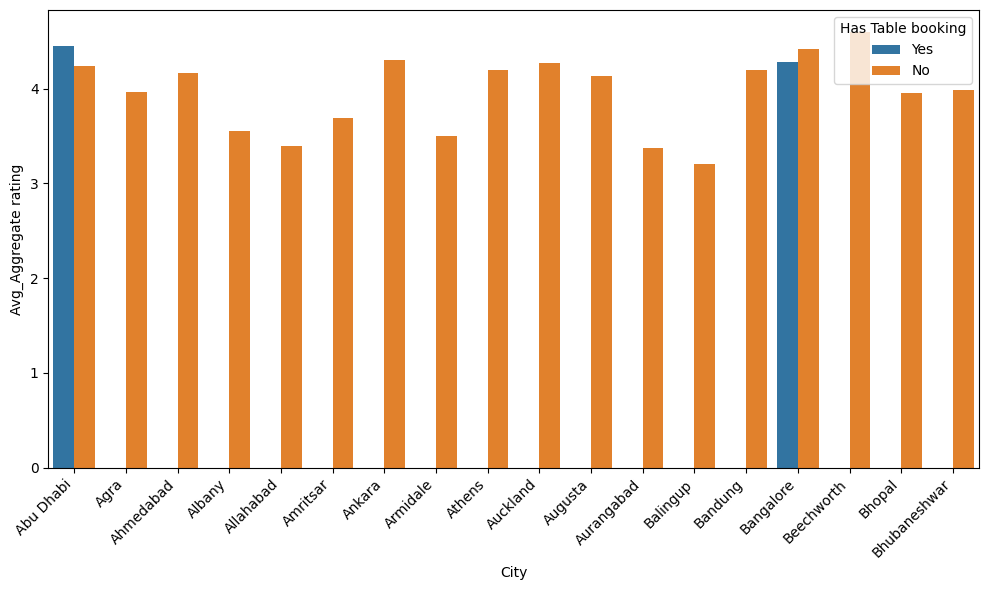

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'City', y= 'Avg_Aggregate rating', data=city_table_booking.head(20), hue='Has Table booking')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observation

In some cities like Abu Dhabi and Birmingham, restaurants with "table booking" have a higher average ratings while cities like Bangalore, Chennai, and Cedar Rapids/Iowa City, restaurants with no table booking have a higher average ratings which implies that the customer preference for this feature varies by city.

There are 8,384 restaurants without table booking feature and 1,158 with the feature.



#### 3b. Online Delivery Analysis

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64


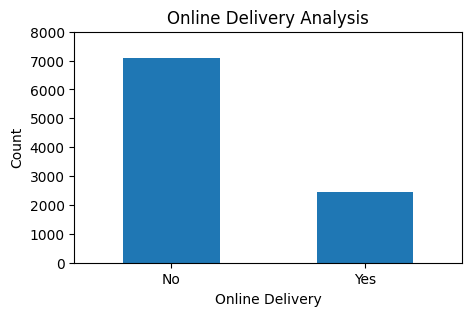

In [57]:
plt.figure(figsize = (5,3))
print(df['Has Online delivery'].value_counts())
df['Has Online delivery'].value_counts().plot(kind='bar')
plt.xticks(rotation = 360)
plt.ylim((0, 8000))
plt.xlabel('Online Delivery' )
plt.ylabel('Count')
plt.title('Online Delivery Analysis')
plt.show()

In [58]:
online_delivery_yes = (df['Has Online delivery'] == 'Yes').sum()
total_count = df['Has Online delivery'].value_counts().sum()
Online_Delivery_Percent = round((online_delivery_yes/total_count) * 100, 2)
Online_Delivery_Percent 


np.float64(25.69)

Price range
1     701
2    1286
3     411
4      53
Name: Has Online delivery, dtype: int64


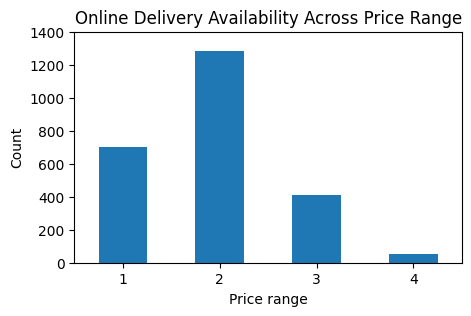

In [59]:
# Online Delivery across price range

online_delivery_yes = df[df['Has Online delivery'] == 'Yes']
print(online_delivery_yes.groupby('Price range')['Has Online delivery'].count())

plt.figure(figsize = (5,3))
online_delivery_yes.groupby('Price range')['Has Online delivery'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylim((0, 1400))
plt.title('Online Delivery Availability Across Price Range')
plt.ylabel('Count')
plt.show()


Is delivering now
No     9508
Yes      34
Name: count, dtype: int64


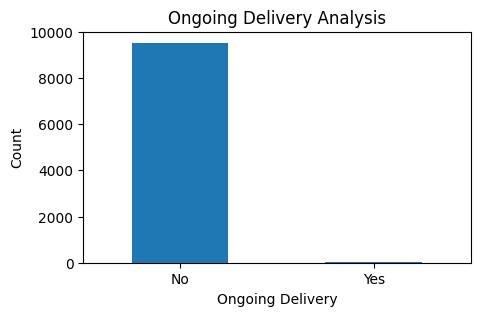

In [60]:
plt.figure(figsize = (5,3))
print(df['Is delivering now'].value_counts())
df['Is delivering now'].value_counts().plot(kind='bar')
plt.xticks(rotation = 360)
plt.ylim((0, 10000))
plt.xlabel('Ongoing Delivery' )
plt.ylabel('Count')
plt.title('Ongoing Delivery Analysis')
plt.show()

#### Observation

1. 25.69% restaurants offer online delivery service.
2. price range 2 has the highest availability of online delivery.
3. 34 restaurants currently have ongoing delivery

#### 3c. Customer Preference

#### i. City Specific Preference

In [61]:
# Popular Cuisine by votes
df_exploded.groupby('Cuisines')['Votes'].sum().nlargest(1)

Cuisines
North Indian    595981
Name: Votes, dtype: int64

In [62]:
city_preference = df_exploded.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()
city_preference = city_preference.sort_values(by= ['City', 'Aggregate rating'],ascending=[True, False]).rename(columns={'Aggregate rating': 'Avg_Aggregate rating'}) 
city_preference.head(50)

,City,Cuisines,Avg_Aggregate rating
7,Abu Dhabi,Desserts,4.600000
3,Abu Dhabi,Asian,4.550000
9,Abu Dhabi,Filipino,4.500000
14,Abu Dhabi,Japanese,4.450000
1,Abu Dhabi,American,4.450000
12,Abu Dhabi,Indonesian,4.400000
24,Abu Dhabi,Thai,4.400000
26,Abu Dhabi,Vietnamese,4.400000
19,Abu Dhabi,North Indian,4.300000
25,Abu Dhabi,Turkish,4.300000


In [63]:
# top cuisine per city
specific_city_preference = city_preference.groupby('City').first().reset_index()
specific_city_preference.head(10)


,City,Cuisines,Avg_Aggregate rating
0,Abu Dhabi,Desserts,4.600000
1,Agra,Cafe,4.400000
2,Ahmedabad,Ice Cream,4.550000
3,Albany,Asian,3.900000
4,Allahabad,Desserts,3.600000
5,Amritsar,Mithai,4.100000
6,Ankara,Pizza,4.700000
7,Armidale,Bar Food,3.500000
8,Athens,Southwestern,4.500000
9,Auckland,Desserts,4.833333


In [64]:
# A cuisine average aggregatebrating trend, I used Desserts cuisine as an example to see the rating across the cities
specific_preference_trend = city_preference[city_preference['Cuisines']== 'Desserts']
specific_preference_trend.sort_values(by='Avg_Aggregate rating', ascending=False)


,City,Cuisines,Avg_Aggregate rating
147,Auckland,Desserts,4.833333
1514,Rio de Janeiro,Desserts,4.800000
1034,Makati City,Desserts,4.800000
810,Hyderabad,Desserts,4.750000
1695,Tampa Bay,Desserts,4.700000
...,...,...,...
261,Birmingham,Desserts,3.100000
723,Gurgaon,Desserts,3.007792
1182,New Delhi,Desserts,2.774674
1253,Noida,Desserts,2.323437


#### ii. Identify consistently high-rated cuisines

In [65]:
cuisine_consistency= city_preference.groupby(['Cuisines'])['Avg_Aggregate rating'].min().reset_index()
#cuisine_consistency.head(20)
cuisine_consistency.sort_values('Avg_Aggregate rating', ascending=False, inplace=True)

#Assumption based on cuisines with a min rating of 4.0

consistently_high_rated = cuisine_consistency[cuisine_consistency['Avg_Aggregate rating'] >= 4.0]
consistently_high_rated

,Cuisines,Avg_Aggregate rating
130,Sunda,4.900000
26,B�_rek,4.700000
61,Hawaiian,4.400000
23,Bubble Tea,4.400000
112,Ramen,4.400000
132,Taiwanese,4.400000
47,D�_ner,4.400000
75,Kebab,4.380000
117,Scottish,4.333333
140,Turkish Pizza,4.325000


In [66]:
print(consistently_high_rated.shape)

(24, 2)


#### Observation

1. The popular cuisines by votes is North Indian.
2. From the above, it could be seen that Desserts cuisine had a higher rating in Auckland city but low rating in Faridabad city.   Which implies that customer preference for some cuisines varies by city.
3. We have 24 cuisines that have an average of 4.0 aggregate rating in all the city they appeared.





## Week 4: Predictive Modelling

Note: For the regression, I will be using the exploded dataset. The exploded dataset has the cuisines unpivoted into different rows.

In [67]:
Skewness = df_exploded['Aggregate rating'].skew()
Skewness

np.float64(-1.221923832708061)

### Feature Engineering

In [68]:
df_exploded.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


-1.5615780484551456


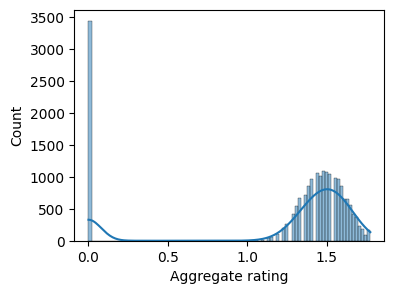

In [69]:
plt.figure(figsize=(4,3))
log_Aggregate_rating = np.log1p(df_exploded['Aggregate rating'])
Skewness = log_Aggregate_rating.skew()
print(Skewness)
sns.histplot(data=log_Aggregate_rating, kde=True)
plt.show()

-1.5725628762563417


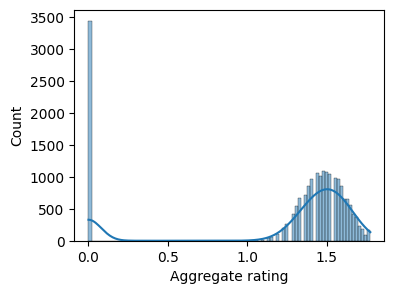

In [70]:
plt.figure(figsize=(4,3))
Sq_Aggregate_rating = np.sqrt(df_exploded['Aggregate rating'])
Skewness = Sq_Aggregate_rating.skew()
print(Skewness)
sns.histplot(data=log_Aggregate_rating, kde=True)
plt.show()

#### Observation

After performing log and square root transformations, it can be seen that the data is still strongly left skewed with a higher skewness value. Therefore, I will proceed with the modeling without any transformations on the target variable.

#### Model Selection

In [71]:
X = df_exploded.drop(columns = ['Aggregate rating', 'Restaurant Name', 'Address', 'Locality Verbose', 'Country Code', 'Is delivering now', 'Switch to order menu',  'Rating color', 'Rating text', 'Latitude', 'Longitude'])
y = df_exploded['Aggregate rating']

The longitude and latitude features were excluded from the analysis due to significant inconsistencies (497 records) between these coordinates and the corresponding city and locality. This decision was made to minimize potential model bias and ensure the accuracy of the results.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

#### Preprocessing

In [73]:
cat_col = X.select_dtypes('object').columns
cat_col

Index(['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery'],
      dtype='object')

In [74]:
encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

In [75]:
X_train_encoded = encoder.fit_transform(X_train[cat_col]).toarray()
X_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
X_test_encoded = encoder.transform(X_test[cat_col]).toarray()
X_test_encoded

C:\Users\Adedamola.Ayeni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [77]:
print(X_train_encoded.shape, X_test_encoded.shape)

(13797, 1424) (5913, 1424)


In [78]:
num_col = X.select_dtypes(np.number).columns
num_col

Index(['Restaurant ID', 'Average Cost for two', 'Price range', 'Votes'], dtype='object')

In [79]:
scaler = StandardScaler()

In [80]:
X_train_scaling = scaler.fit_transform(X_train[num_col])
X_test_scaling = scaler.transform(X_test[num_col])

In [81]:
print(X_train_scaling.shape, X_test_scaling.shape)

(13797, 4) (5913, 4)


In [82]:
X_trainprocessed = np.hstack((X_train_encoded, X_train_scaling))
X_testprocessed = np.hstack((X_test_encoded, X_test_scaling))

In [83]:
print (X_trainprocessed.shape, y_train.shape)

(13797, 1428) (13797,)


In [84]:
model = LinearRegression()

In [85]:
model.fit(X_trainprocessed, y_train)

LinearRegression()

In [86]:
y_train_pred = model.predict(X_trainprocessed)
y_test_pred = model.predict(X_testprocessed)


In [87]:
train_score = r2_score(y_train_pred, y_train)
test_score = r2_score(y_test_pred, y_test)
print(train_score, test_score)

0.320435520212741 0.2538451647404111


In [88]:
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test_pred, y_test)
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))
print(train_mse, test_mse)
print(train_rmse, test_rmse)

0.8123667414451653 0.8849132091632923
0.9013138972883783 0.9406982561710702


In [89]:
def parameter(**param):
    models = {
        #'Regression': LinearRegression(**param),
        'DecisionTree': DecisionTreeRegressor(**param),
        'RandomForest': RandomForestRegressor(**param),
        'GradientBoosting': GradientBoostingRegressor(**param)
    }
    
    for name, model in models.items():
        model.fit(X_trainprocessed, y_train)
    
        y_train_pred = model.predict(X_trainprocessed)
        y_test_pred = model.predict(X_testprocessed)

        train_mse = mean_squared_error(y_train_pred, y_train)
        test_mse = mean_squared_error(y_test_pred, y_test)

        train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))

        train_score = r2_score(y_train_pred, y_train)
        test_score = r2_score(y_test_pred, y_test)

        train_mae = mean_absolute_error(y_train_pred, y_train)
        test_mae = mean_absolute_error(y_test_pred, y_test)

        print(f'{name} - train_score: {train_score:.3f}, test_score: {test_score:.3f}\n train_mse: {train_mse:.3f},test_mse: {test_mse:.3f}\ntrain_rmse: {train_rmse:.3f},test_rmse: {test_rmse:.3f}\n train_mae:{train_mae:.3f}, test_mae:{test_mae:.3f}')

parameter(random_state = 42)

DecisionTree - train_score: 1.000, test_score: 0.978
 train_mse: 0.000,test_mse: 0.044
train_rmse: 0.000,test_rmse: 0.210
 train_mae:0.000, test_mae:0.081
RandomForest - train_score: 0.998, test_score: 0.983
 train_mse: 0.005,test_mse: 0.032
train_rmse: 0.067,test_rmse: 0.179
 train_mae:0.038, test_mae:0.102
GradientBoosting - train_score: 0.958, test_score: 0.954
 train_mse: 0.078,test_mse: 0.085
train_rmse: 0.280,test_rmse: 0.292
 train_mae:0.197, test_mae:0.203


### Modeling after removing the Zeros rating record

In [90]:
df_exploded = df_exploded[df_exploded['Aggregate rating'] > 0]

#### Model Selection

In [91]:
X = df_exploded.drop(columns = ['Aggregate rating', 'Restaurant Name', 'Address', 'Locality Verbose', 'Country Code', 'Is delivering now', 'Switch to order menu',  'Rating color', 'Rating text', 'Latitude', 'Longitude'])
y = df_exploded['Aggregate rating']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

#### Preprocessing

In [93]:
cat_col = X.select_dtypes('object').columns
cat_col

Index(['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery'],
      dtype='object')

In [94]:
encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

In [95]:
X_train_encoded = encoder.fit_transform(X_train[cat_col]).toarray()
X_test_encoded = encoder.transform(X_test[cat_col]).toarray()

C:\Users\Adedamola.Ayeni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [96]:
num_col = X.select_dtypes(np.number).columns
num_col

Index(['Restaurant ID', 'Average Cost for two', 'Price range', 'Votes'], dtype='object')

In [97]:
X_train_scaling = scaler.fit_transform(X_train[num_col])
X_test_scaling = scaler.transform(X_test[num_col])

In [98]:
X_trainprocessed = np.hstack((X_train_encoded, X_train_scaling))
X_testprocessed = np.hstack((X_test_encoded, X_test_scaling))

In [99]:
model = LinearRegression()

In [100]:
model.fit(X_trainprocessed, y_train)

LinearRegression()

In [101]:
y_train_pred = model.predict(X_trainprocessed)
y_test_pred = model.predict(X_testprocessed)

In [102]:
train_score = r2_score(y_train_pred, y_train)
test_score = r2_score(y_test_pred, y_test)
print(train_score, test_score)

0.45745822062040054 0.3614362001182626


In [103]:
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test_pred, y_test)

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))
print(train_mse, test_mse)
print(train_rmse, test_rmse)

0.1110081236704995 0.125999784647259
0.33317881635917296 0.3549644836420385


In [104]:
train_mae = mean_absolute_error(y_train_pred, y_train)
test_mae = mean_absolute_error(y_test_pred, y_test)
print(train_mae, test_mae)

0.24553523977116737 0.26773162333930145


In [105]:
def parameter(**param):
    models = {
        
        'DecisionTree': DecisionTreeRegressor(**param),
        'RandomForest': RandomForestRegressor(**param),
        'GradientBoosting': GradientBoostingRegressor(**param)
    }
    
    for name, model in models.items():
        model.fit(X_trainprocessed, y_train)
    
        y_train_pred = model.predict(X_trainprocessed)
        y_test_pred = model.predict(X_testprocessed)

        train_mse = mean_squared_error(y_train_pred, y_train)
        test_mse = mean_squared_error(y_test_pred, y_test)

        train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
        test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))

        train_score = r2_score(y_train_pred, y_train)
        test_score = r2_score(y_test_pred, y_test)

        train_mae = mean_absolute_error(y_train_pred, y_train)
        test_mae = mean_absolute_error(y_test_pred, y_test)

        print(f'{name} - train_score: {train_score:.3f}, test_score: {test_score:.3f}\n train_mse: {train_mse:.3f},test_mse: {test_mse:.3f}\ntrain_rmse: {train_mse:.3f},test_rmse: {test_mse:.3f}\n train_mae:{train_mae:.3f}, test_mae:{test_mae:.3f}')

parameter(random_state = 42)

DecisionTree - train_score: 1.000, test_score: 0.818
 train_mse: 0.000,test_mse: 0.053
train_rmse: 0.000,test_rmse: 0.053
 train_mae:0.000, test_mae:0.096
RandomForest - train_score: 0.981, test_score: 0.844
 train_mse: 0.005,test_mse: 0.039
train_rmse: 0.005,test_rmse: 0.039
 train_mae:0.045, test_mae:0.123
GradientBoosting - train_score: 0.523, test_score: 0.514
 train_mse: 0.092,test_mse: 0.093
train_rmse: 0.092,test_rmse: 0.093
 train_mae:0.231, test_mae:0.233


#### Observation

##### Model Comparison:

Two versions of the unpivoted dataset, one with outliers and one without, were used to train models. The results showed that RandomForest consistently outperformed other models, while LinearRegression performed poorly due to its sensitivity to skewness.

Likewise, the model with zero(0) rating dataset performed better than the other model without the zero(0) rating record.

1. DecisionTree: Overfitting can't be ruled out, given the perfect train score and relatively lower test score.
2. RandomForest: Performs well, with a high test score and relatively low MSE, RMSE, and MAE implying that it generalizes well better than DecisionTree and GradientBoosting.
3. GradientBoosting: More stable looking at the closeness of the train and test score, but has higher errors and lower test score than DecisionTree and RandomForest.

### 8. Conclusion and Recommendation

i. **Model Optimization:**

Based on the models' evaluation results, the following conclusions and recommendations were made:

RandomForest: Due to its outstanding performance on both training and testing datasets, RandomForest is the top choice.

DecisionTree: If DecisionTree is still preferred, consider regularization to mitigate overfitting.

GradientBoosting: Fine-tuning GradientBoosting's hyperparameters can enhance its performance.

LinearRegression: LinearRegression excels with linear, normally distributed data and minimal multicollinearity. To address skewness, consider alternative transformations like Box-Cox, as log and square root transformations were ineffective.

Also, an ensemble method like XGBoost may be considered because it is particularly good for handling zero-heavy data due to its ability to manage skewed distributions and missing values effectively.

By selecting the best-performing model and fine-tuning its hyperparameters, the accuracy and reliability of the model's predictions can be significantly improved.

ii. **Business Recommendation**

To drive business growth and maximize revenue potential, restaurant owners within the dataset's vicinity must prioritize customer retention and new customer attraction. Based on our analysis, the following strategic recommendations can help owners increase customer loyalty, attract new customers, and maintain a competitive edge in the market:

1. Focus on growing your business in cities such as New Delhi, Inner City etc. where demand is high and ratings are favorable.
2. Conduct market research to better understand customer preferences in different cities.
3. Provide online delivery services, particularly for cuisines in Price Range 2, and implement table booking options to attract more customers and improve ratings.
4. Focus on improving the quality of your restaurants, as evidenced by the positive correlation between votes and aggregate ratings.
5. Continuous monitoring, evaluating, and adjusting the business strategies based on customer feedback and ratings.